# Análise exploratória e extração de features

Aqui nós tratamos de um *case* fictício em que uma companhia ferroviária quer utilizar um novo sistema de propulsão.
Temos que responder algumas perguntas, que serão chamadas de **hipóteses**. São elas:

- Pessoas viajam mais durante a semana.
- Há horários de pico por causa das idas e vindas do trabalho.
- Há períodos do mês onde a demanda por transporte é maior.

Embora consigamos respondê-las empiricamente, precisamos pautar as nossas respostas em métodos estatísticos para confirmar a veracidade delas.

Para isto, faremos a chamada **análise exploratória dos dados** e a **extração de features**, mas o que isso significa?

**Análise Exploratória de Dados (AED)**
> Análise Exploratória de Dados (AED), de acordo com [Raniere Ramos](https://oestatistico.com.br/trabalho-estatistico-2/) é: "examinar previamente os dados" e esta verificação ajuda na extração de informações relevantes de um conjunto de dados. 


**Extração de Features**
> Em suma, seria a extração das características do nosso dataset e, assim, conseguir gerar *insights* a partir de uma AED.

# 1. Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Importação e leitura do dataset

In [2]:
# importando o dataset e o transformando em um DataFrame
file = "trem.csv"
df = pd.read_csv(file)

In [3]:
df.head().dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

Visualizando o nosso dataset, podemos ver que existem 4 colunas.
- ID: é o identificador;
- Datetime: é a data + horário
- Count: é a contagem de veículos

Vemos os tipos das colunas ao lado. Perceba que a coluna `Datetime` é uma `string`, porém como utilizaremos ela para testar as nossas hipóteses, ela precisa ser convertida para data.

In [4]:
# convertendo a coluna Datetime para data e hora
df['Datetime'] = pd.to_datetime(df['Datetime'], format = "%d-%m-%Y %H:%M")

In [5]:
# visualizando como ficou após a transformação de tipos
df['Datetime']

0       2012-08-25 00:00:00
1       2012-08-25 01:00:00
2       2012-08-25 02:00:00
3       2012-08-25 03:00:00
4       2012-08-25 04:00:00
                ...        
18283   2014-09-25 19:00:00
18284   2014-09-25 20:00:00
18285   2014-09-25 21:00:00
18286   2014-09-25 22:00:00
18287   2014-09-25 23:00:00
Name: Datetime, Length: 18288, dtype: datetime64[ns]

In [6]:
# visualizando como está o dataset
df.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


Vemos que existe uma coluna desnecessária que é o `ID`, portanto vamos removê-la.

In [7]:
df.drop('ID', inplace = True, axis=1)

In [8]:
df.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


### Plotando o gráfico.

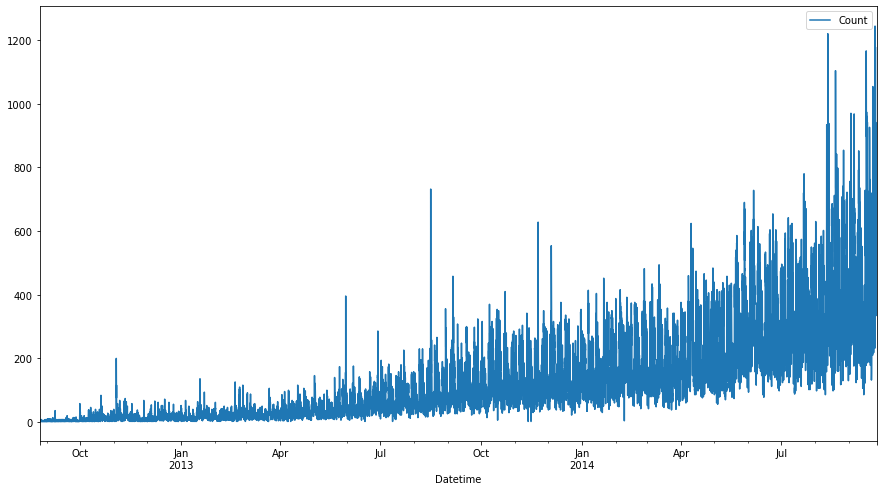

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='Datetime', y='Count', ax=ax);

O gráfico acima não nos diz nada.
Devemos nos ater a responder as perguntadas feitas pela companhia.

# 3. As pessoas viajam mais durante a semana?

O que vamos fazer abaixo é criar novas colunas:
- Ano
- Mês
- Dia
- Hora
- Dias_da_semana

In [10]:
df["Ano"] = df.Datetime.dt.year
df["Mês"] = df.Datetime.dt.month
df["Day"] = df.Datetime.dt.day
df["Hora"] = df.Datetime.dt.hour
df["Dias_da_semana"] = df.Datetime.dt.dayofweek

### Visualizando o dataset atual

In [11]:
df

,Datetime,Count,Ano,Mês,Day,Hora,Dias_da_semana
0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,2012-08-25 04:00:00,2,2012,8,25,4,5
...,...,...,...,...,...,...,...
18283,2014-09-25 19:00:00,868,2014,9,25,19,3
18284,2014-09-25 20:00:00,732,2014,9,25,20,3
18285,2014-09-25 21:00:00,702,2014,9,25,21,3
18286,2014-09-25 22:00:00,580,2014,9,25,22,3


In [12]:
df.dtypes

Datetime          datetime64[ns]
Count                      int64
Ano                        int64
Mês                        int64
Day                        int64
Hora                       int64
Dias_da_semana             int64
dtype: object

Como queremos saber se as pessoas viajam mais durante a semana, vamos utilizar a seguinte técnica.
> Sabemos que a semana útil é composta de 5 dias, sendo: segunda-feira, terça-feira, quarta-feira, quinta-feira e sexta-feira. Como a contagem inicia do 0, temos na seguinte forma: segunda-feira (0), terça-feira (1), quarta-feira (2), quinta-feira (3), sexta-feira (4), sábado (5) e domingo (6).
Esta informação é importante, pois consideraremos que os dias da semana serão iguais a `0` e os dias que não são da semana útil serão iguais a `1`, ou seja, sábado e domingo = 1.

Primeiro, vamos colocar inserir uma nova coluna chamada `Semana` e **TODOS** os valores iguais a 0. 
Em segundo, faremos uma condicional de que, se `Dia_da_semana == 5 | Dia_da_semana == 6` então `df['Semana'] == 1`.

In [13]:
df["Semana"] = 0
df.loc[(df.Dias_da_semana == 5) | (df.Dias_da_semana == 6), "Semana"] = 1

In [14]:
df.head()

,Datetime,Count,Ano,Mês,Day,Hora,Dias_da_semana,Semana
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [15]:
df.tail()

,Datetime,Count,Ano,Mês,Day,Hora,Dias_da_semana,Semana
18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0


### Comparando os valores de dias da semana x finais de semana

In [16]:
df["Semana"].value_counts()

0    13056
1     5232
Name: Semana, dtype: int64

### Plotando um gráfico de barras

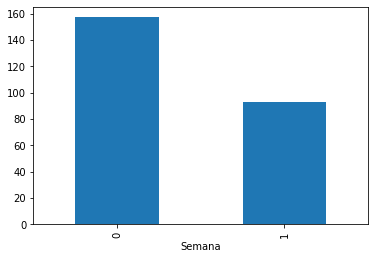

In [17]:
df.groupby("Semana").Count.mean().plot.bar();

# As pessoas viajam mais durante a semana?
Sim, segundo o gráfico acima mostrado, podemos ver que as pessoas viajam mais durante a semana que no final de semana.

# 4. Há horários de pico por causa das idas e vindas do trabalho?

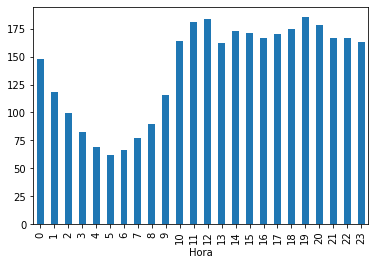

In [18]:
df.groupby("Hora").Count.mean().plot.bar();

# Há horários de pico por causa das idas e vindas do trabalho?
Sim, podemos ver que às 12 e às 19h são os maiores valores acompanhados por horários próximos.

# 5. Há períodos do mês em que a demanda por transporte é maior?

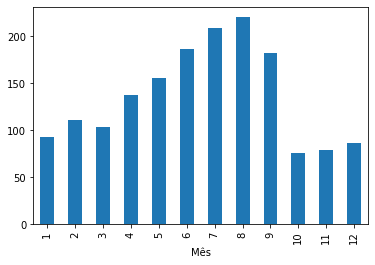

In [19]:
df.groupby("Mês").Count.mean().plot.bar();

# Há períodos do mês em que a demanda por transporte é maior?
Sim, o mês de Agosto é o mês em que mais ocorre demanda por transporte acompanhado de Julho, Junho e Setembro. Nos períodos de férias (Janeiro, Dezembro), temos valores baixos.